In [1]:
from hmr import Reloader
import legendkit as lk
lk = Reloader(lk)

In [2]:
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerBase, HandlerPatch
from matplotlib.patches import Rectangle, Circle

from abc import ABC

from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib.collections import Collection, PatchCollection

In [3]:
class BoxplotHanlder(HandlerPatch):
    def _create_patch(self, legend, orig_handle,
                      xdescent, ydescent, width, height, fontsize):
        #print(xdescent, ydescent, width, height, fontsize)
        if width / height < 1.2:
            height = height * 0.6
            ydescent = ydescent - height * 0.2
        #print(xdescent, ydescent)
        box_w, box_h = 0.9, 0.6
        woffset = (1 - box_w) / 2
        hoffset = (1 - box_h) / 2
        box = Rectangle(xy=(-xdescent + woffset * width, -ydescent + height * hoffset),
                      width=width * box_w, height=height * box_h)
        
        linewidth = 1
        vline = Rectangle(xy=(-xdescent + width / 2 - linewidth / 2, -ydescent), 
                         width=linewidth / 2, height=height)
        
        hline = Rectangle(xy=(-xdescent + woffset * width, 
                              -ydescent + height * 0.5 - linewidth / 4), 
                          width=width * box_w, 
                          height=linewidth /2)
        
        return PatchCollection([vline, box, hline], match_original=True)
    
    def create_artists(self, legend, orig_handle,
                   xdescent, ydescent, width, height, fontsize, trans):
        p = self._create_patch(legend, orig_handle,
                               xdescent, ydescent, width, height, fontsize)
        self.update_prop(p, orig_handle, legend)
        p.set_transform(trans)
        return [p]
    
    
class BoxplotItem(Collection, ABC):
    
        def __init__(self, *args, **kwargs):
            user_ec = kwargs.get('ec')
            user_edgecolor = kwargs.get('edgecolor')
            if (user_ec is None) & (user_edgecolor is None):
                kwargs['ec'] = "black"
            super().__init__(*args, **kwargs)

In [4]:
from matplotlib.legend import Legend

_default_handlers = Legend.get_default_handler_map()
Legend.set_default_handler_map({**_default_handlers,
                                BoxplotItem: BoxplotHanlder(),
                                })

15.45


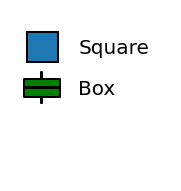

In [10]:
_, ax = plt.subplots(figsize=(1, 1.5))
lk.legend(
    handles=[lk.SquareItem(ec="black"), BoxplotItem(fc="green")],
    labels=['Square', 'Box'],
    handlelength=2,
    handleheight=2,
    frameon=False
)
ax.set_axis_off()